# <NEELIMA>_<AARE>_119_MiTH.<extension>

# Problem Statement: Predict assessed property value for the purpose of property tax assessment



# 1. Importing necessary libraries

In [449]:
# Importing all necessary Libaries

import numpy as np # used for mathematical operation on array
import pandas as pd  # used for data manipulation on dataframe
import seaborn as sns # used for data visualization
import matplotlib.pyplot as plt #  used for data visualization
import warnings
warnings.filterwarnings('ignore')

# 2. Reading the dataset

In [450]:
# Read the dataset with the help of pandas

df = pd.read_csv("Train-1665386529049.csv",header=0)
df

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,30/05/2014,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,13/09/2014,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,28/09/2014,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,05/06/2014,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,07/02/2015,640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,PR27906,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1213,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,29715,2803,2004,2,R4,30/11/2014,8454562
16806,PR27907,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1054,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2252,2003,2,R4,19/12/2014,6250000
16807,PR27908,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1102,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2177,2003,2,R4,16/11/2014,7150000
16808,PR27909,4,NY,TRIBECA,250 SOUTH END AVENUE,10280,16,2249,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12644,594,1981,2,R4,17/09/2014,550000


In [451]:
# Reading first 5 Rows of the data

df.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,30/05/2014,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,13/09/2014,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,28/09/2014,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,05/06/2014,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,07/02/2015,640000


In [452]:
# Reading last 5 Rows of the data

df.tail()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
16805,PR27906,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1213,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,29715,2803,2004,2,R4,30/11/2014,8454562
16806,PR27907,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1054,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2252,2003,2,R4,19/12/2014,6250000
16807,PR27908,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1102,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2177,2003,2,R4,16/11/2014,7150000
16808,PR27909,4,NY,TRIBECA,250 SOUTH END AVENUE,10280,16,2249,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12644,594,1981,2,R4,17/09/2014,550000
16809,PR27910,4,NY,HARLEM-UPPER,415 WEST 150 STREET,10031,2065,22,08 RENTALS - ELEVATOR APARTMENTS,16,1,17,4996,29529,2007,2,D7,22/03/2013,5000000


In [453]:
# Checking the shape of the data

df.shape

(16810, 19)

In [454]:
# Checking the rows of the data

df.shape[0]

16810

In [455]:
# Checking the column of the data

df.shape[1]

19

In [456]:
#Reading the name of the columns

df.columns

Index(['PropertyID', 'Borough', 'State', 'Surroundings', 'Address', 'ZipCode',
       'Block', 'Lot', 'BldgClassCategory', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'DateOfEvaluation',
       'PropertyEvaluationvalue'],
      dtype='object')

In [457]:
df.dtypes

PropertyID                    object
Borough                        int64
State                         object
Surroundings                  object
Address                       object
ZipCode                        int64
Block                          int64
Lot                            int64
BldgClassCategory             object
NoOfResidentialUnits           int64
NoOfCommercialUnits            int64
TotalNoOfUnits                 int64
LandAreaInSqFt                 int64
GrossAreaInSqFt                int64
YearOfConstruction             int64
TaxClass_AtEvaluationTime      int64
BldgClass_AtEvaluationTime    object
DateOfEvaluation              object
PropertyEvaluationvalue        int64
dtype: object

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16810 entries, 0 to 16809
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   PropertyID                  16810 non-null  object
 1   Borough                     16810 non-null  int64 
 2   State                       16810 non-null  object
 3   Surroundings                16810 non-null  object
 4   Address                     16810 non-null  object
 5   ZipCode                     16810 non-null  int64 
 6   Block                       16810 non-null  int64 
 7   Lot                         16810 non-null  int64 
 8   BldgClassCategory           16810 non-null  object
 9   NoOfResidentialUnits        16810 non-null  int64 
 10  NoOfCommercialUnits         16810 non-null  int64 
 11  TotalNoOfUnits              16810 non-null  int64 
 12  LandAreaInSqFt              16810 non-null  int64 
 13  GrossAreaInSqFt             16810 non-null  in

In [459]:
# to check if there are any null values we use isnull()

In [460]:
df.isnull()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16806,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16807,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16808,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [461]:
df.isnull().sum()

PropertyID                    0
Borough                       0
State                         0
Surroundings                  0
Address                       0
ZipCode                       0
Block                         0
Lot                           0
BldgClassCategory             0
NoOfResidentialUnits          0
NoOfCommercialUnits           0
TotalNoOfUnits                0
LandAreaInSqFt                0
GrossAreaInSqFt               0
YearOfConstruction            0
TaxClass_AtEvaluationTime     0
BldgClass_AtEvaluationTime    0
DateOfEvaluation              0
PropertyEvaluationvalue       0
dtype: int64

In [462]:
df.isnull().sum().sum()

0

In [463]:
# from the above observation we can conclude that there are no null values present

# Descriptive Statistics

In [464]:
# view the descriptive statistics of the dataset

df.describe()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
count,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,1.681000e+04,1.681000e+04,16810.000000,16810.000000,1.681000e+04
mean,3.439143,10871.027543,5428.122308,266.327722,1.862225,0.137775,2.000000,1.092492e+04,3.612157e+03,1973.982867,1.289530,8.084101e+05
std,1.398950,522.996869,3710.031921,542.420132,8.027805,2.185857,8.472771,5.837620e+04,1.627378e+04,23.632595,0.713779,8.978317e+05
min,1.000000,10001.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1941.000000,1.000000,1.000440e+05
25%,2.000000,10312.000000,2401.250000,25.000000,1.000000,0.000000,1.000000,2.100000e+03,1.224000e+03,1951.000000,1.000000,4.250000e+05
50%,3.000000,11207.000000,5050.000000,52.000000,1.000000,0.000000,1.000000,3.200000e+03,1.750000e+03,1968.000000,1.000000,5.900000e+05
75%,5.000000,11364.000000,7376.750000,138.000000,2.000000,0.000000,2.000000,5.000000e+03,2.449750e+03,1998.000000,1.000000,8.450000e+05
max,5.000000,11694.000000,16314.000000,5323.000000,437.000000,252.000000,437.000000,5.612000e+06,1.172005e+06,2012.000000,4.000000,9.935000e+06


In [465]:
# check the Mean PropertyEvaluationvalue grouped by BldgClassCategory in ascending order

In [466]:
pd.DataFrame(df.groupby(['BldgClassCategory'])['PropertyEvaluationvalue'].mean()).sort_values('PropertyEvaluationvalue',ascending=True)

,PropertyEvaluationvalue
BldgClassCategory,
25 LUXURY HOTELS,1.281442e+05
45 CONDO HOTELS,1.383320e+05
09 COOPS - WALKUP APARTMENTS,1.921288e+05
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,2.036500e+05
38 ASYLUMS AND HOMES,2.099760e+05
10 COOPS - ELEVATOR APARTMENTS,2.795187e+05
01 ONE FAMILY HOMES,4.847993e+05
38 ASYLUMS AND HOMES,4.999000e+05
41 TAX CLASS 4 - OTHER,5.033333e+05


In [467]:
# check the Median PropertyEvaluationvalue grouped by BldgClassCategory in ascending order

In [468]:
pd.DataFrame(df.groupby(['BldgClassCategory'])['PropertyEvaluationvalue'].median()).sort_values('PropertyEvaluationvalue',ascending=True)


,PropertyEvaluationvalue
BldgClassCategory,
25 LUXURY HOTELS,116285.5
45 CONDO HOTELS,138332.0
10 COOPS - ELEVATOR APARTMENTS,184000.0
09 COOPS - WALKUP APARTMENTS,194257.5
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,203650.0
38 ASYLUMS AND HOMES,209976.0
04 TAX CLASS 1 CONDOS,412500.0
01 ONE FAMILY HOMES,430000.0
41 TAX CLASS 4 - OTHER,435000.0


In [469]:
df.mean()

Borough                           3.439143
ZipCode                       10871.027543
Block                          5428.122308
Lot                             266.327722
NoOfResidentialUnits              1.862225
NoOfCommercialUnits               0.137775
TotalNoOfUnits                    2.000000
LandAreaInSqFt                10924.918441
GrossAreaInSqFt                3612.156871
YearOfConstruction             1973.982867
TaxClass_AtEvaluationTime         1.289530
PropertyEvaluationvalue      808410.132540
dtype: float64

In [470]:
df.median()

Borough                           3.0
ZipCode                       11207.0
Block                          5050.0
Lot                              52.0
NoOfResidentialUnits              1.0
NoOfCommercialUnits               0.0
TotalNoOfUnits                    1.0
LandAreaInSqFt                 3200.0
GrossAreaInSqFt                1750.0
YearOfConstruction             1968.0
TaxClass_AtEvaluationTime         1.0
PropertyEvaluationvalue      590000.0
dtype: float64

# Data Visualization

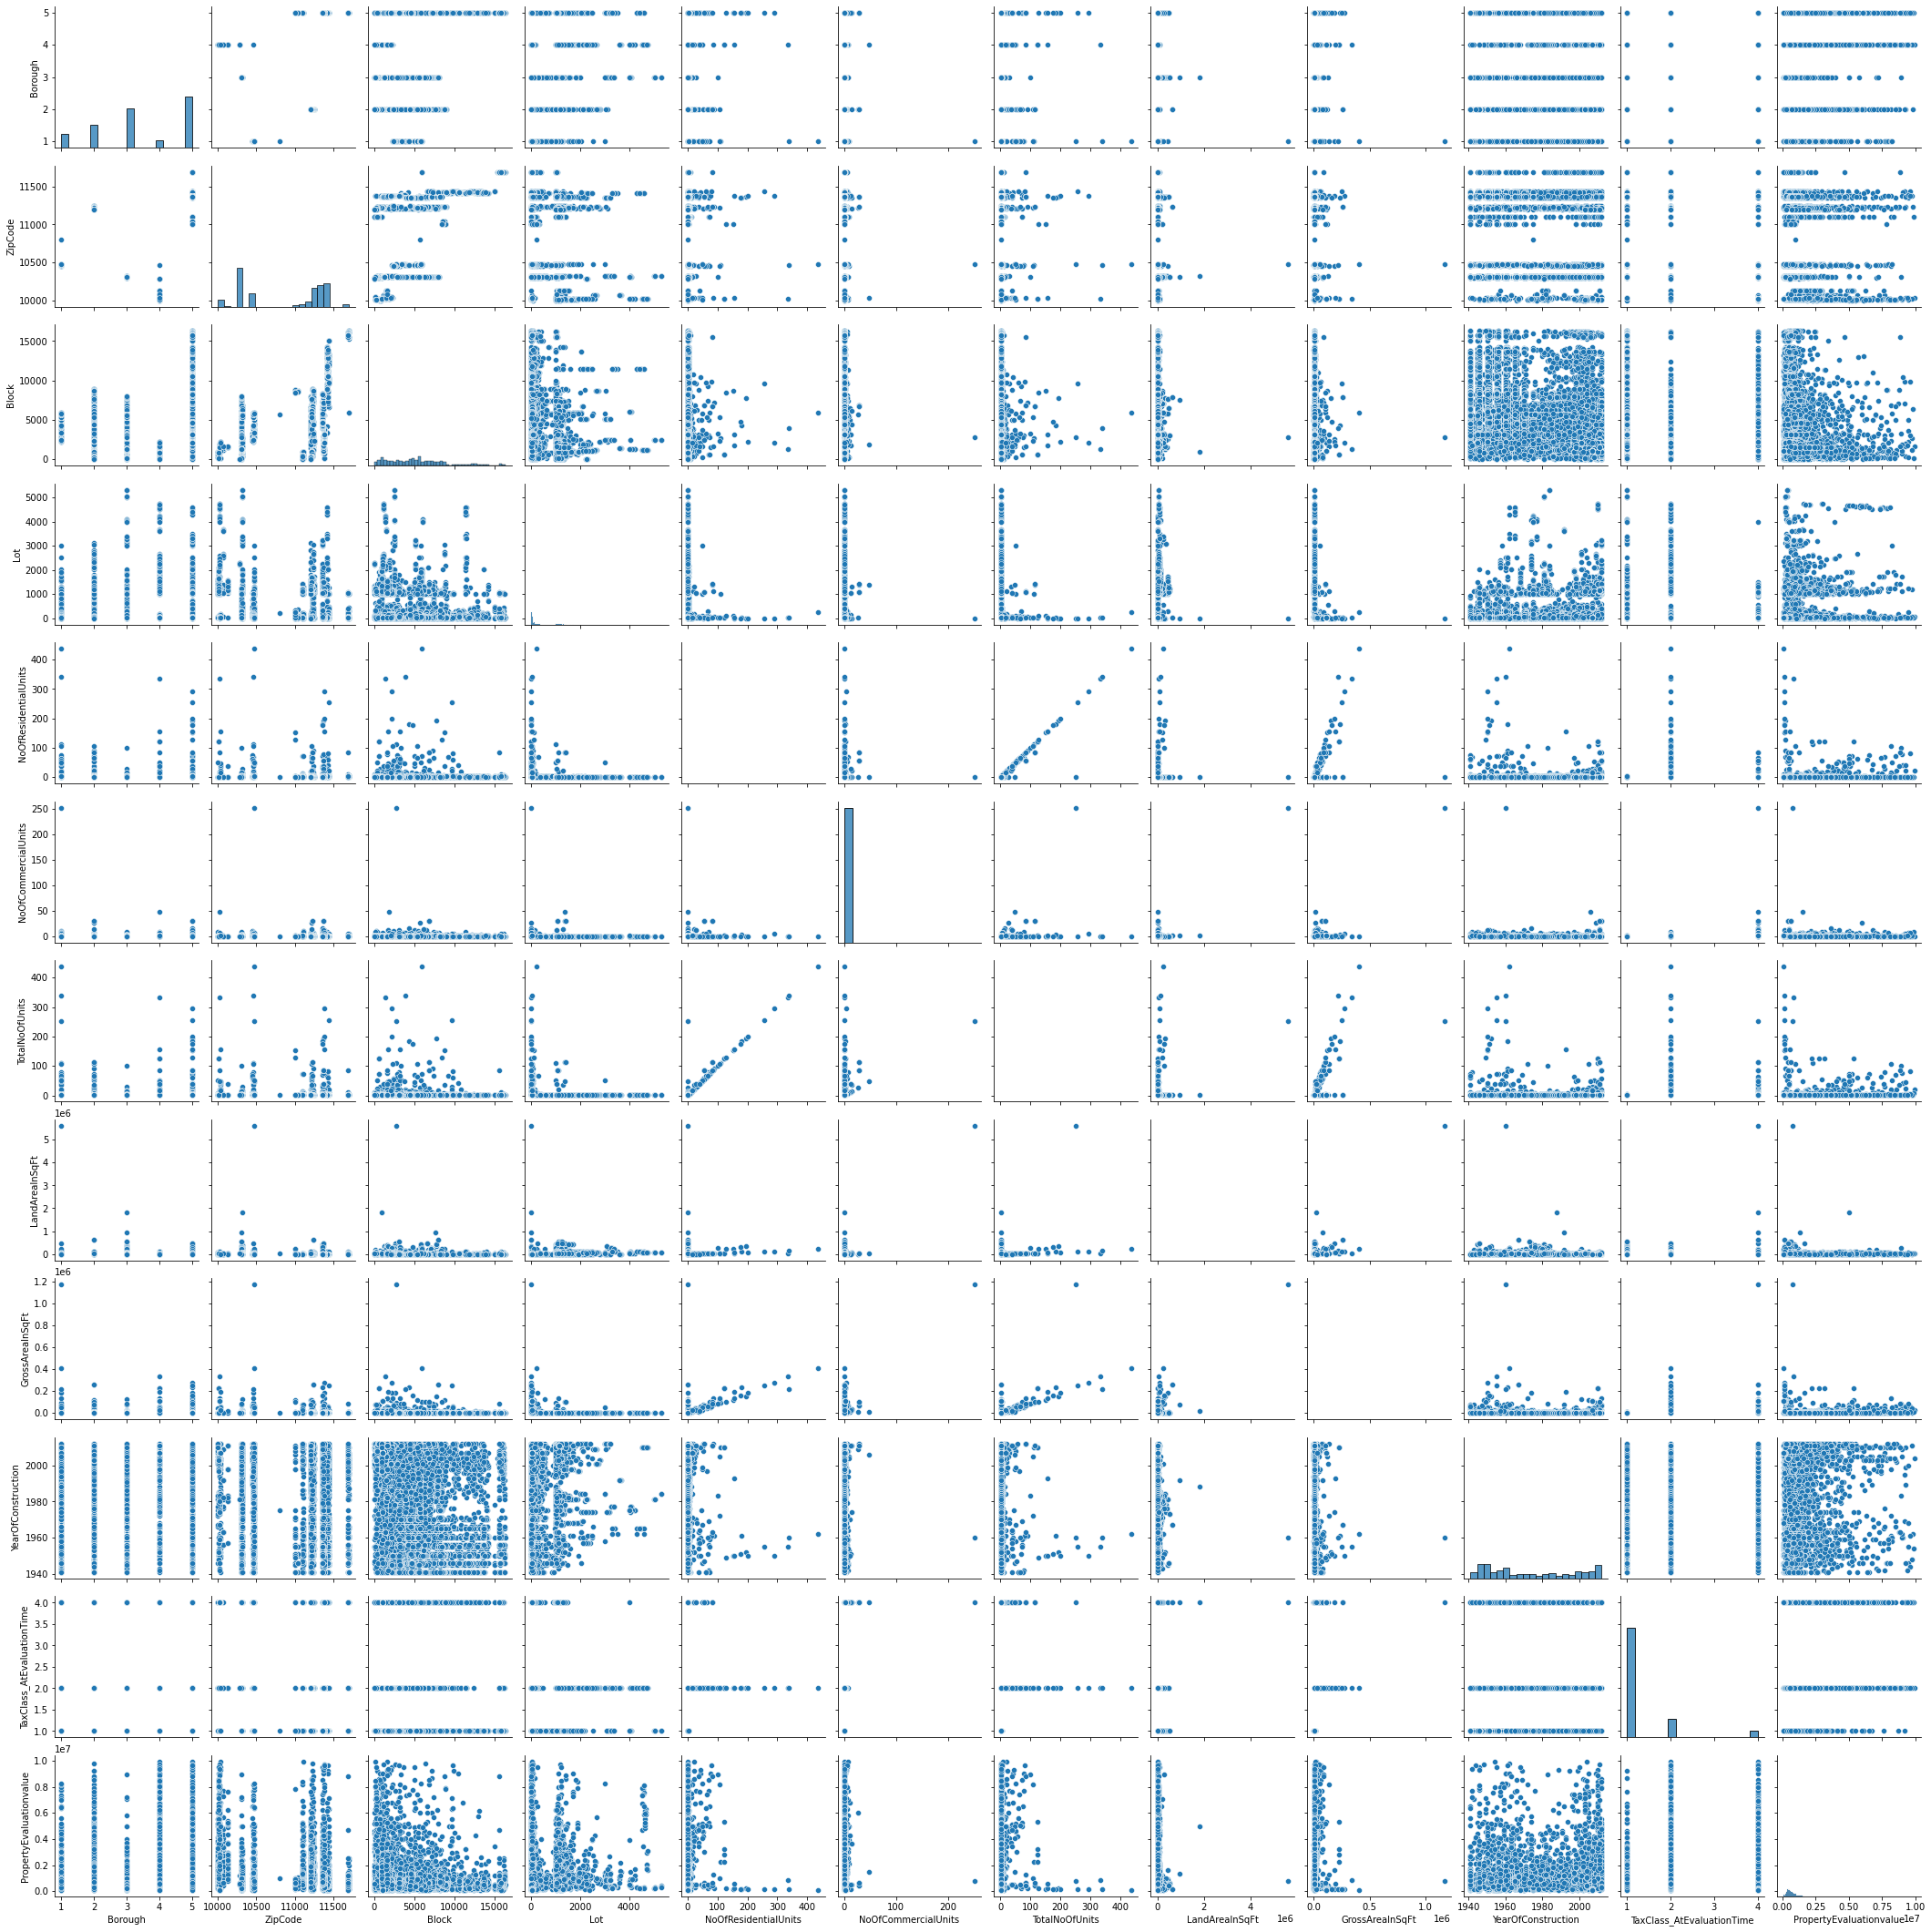

In [471]:
# Visulaizing the Pairplot of complete dataset

sns.pairplot(df)

In [472]:
# calculating the correlation of complete dataset

corr = df.corr()
corr

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
Borough,1.000000,0.488406,0.313951,0.005866,-0.005122,-0.006849,-0.006620,0.002994,0.005231,-0.168352,0.003318,0.049743
ZipCode,0.488406,1.000000,0.528438,-0.125573,0.014876,-0.002288,0.013504,-0.046456,-0.090817,-0.261036,-0.044437,-0.012603
Block,0.313951,0.528438,1.000000,-0.240481,-0.008005,-0.024037,-0.013785,-0.046750,-0.083749,-0.269244,-0.234643,-0.186906
Lot,0.005866,-0.125573,-0.240481,1.000000,-0.025278,-0.000308,-0.024030,0.234273,-0.050164,0.339635,0.280392,0.207938
NoOfResidentialUnits,-0.005122,0.014876,-0.008005,-0.025278,1.000000,0.073065,0.966332,0.049807,0.467357,0.005098,0.038005,0.098409
NoOfCommercialUnits,-0.006849,-0.002288,-0.024037,-0.000308,0.073065,1.000000,0.327214,0.660527,0.604961,0.020689,0.219687,0.068230
TotalNoOfUnits,-0.006620,0.013504,-0.013785,-0.024030,0.966332,0.327214,1.000000,0.217598,0.598885,0.010168,0.092686,0.110843
LandAreaInSqFt,0.002994,-0.046456,-0.046750,0.234273,0.049807,0.660527,0.217598,1.000000,0.465828,0.018417,0.090533,0.034867
GrossAreaInSqFt,0.005231,-0.090817,-0.083749,-0.050164,0.467357,0.604961,0.598885,0.465828,1.000000,0.085072,0.328519,0.068621
YearOfConstruction,-0.168352,-0.261036,-0.269244,0.339635,0.005098,0.020689,0.010168,0.018417,0.085072,1.000000,0.210623,0.113079


<AxesSubplot:>

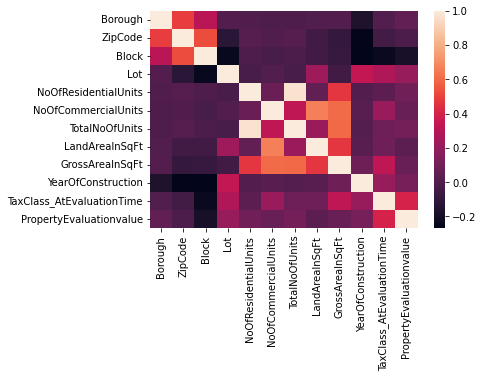

In [473]:
# Visulaizing the heatmap of complete dataset

sns.heatmap(corr)

In [474]:
# dropping the columns that are not important and are unique in values

In [475]:
df1=df.drop(columns=['PropertyID','State','Surroundings','Address','BldgClassCategory','BldgClass_AtEvaluationTime','DateOfEvaluation'])
df1

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
0,1,10456,2927,127,2,0,2,1900,2394,1990,1,540000
1,1,10457,3037,110,3,0,3,1687,3037,2002,1,750000
2,1,10457,2912,155,2,0,2,2000,2400,1989,1,470000
3,1,10457,2929,134,2,0,2,2356,2394,1991,1,570000
4,1,10457,3036,140,2,0,2,3346,2308,1993,1,640000
...,...,...,...,...,...,...,...,...,...,...,...,...
16805,4,10007,123,1213,1,0,1,29715,2803,2004,2,8454562
16806,4,10013,176,1054,1,0,1,12518,2252,2003,2,6250000
16807,4,10013,176,1102,1,0,1,12518,2177,2003,2,7150000
16808,4,10280,16,2249,1,0,1,12644,594,1981,2,550000


# X-y split (Input-Output Split)

In [476]:
# Separating the output from the dataset

X = df1.loc[:,df1.columns!="PropertyEvaluationvalue"]
type(X)

pandas.core.frame.DataFrame

In [477]:
# Checking the first five rows of the input columns

X.head()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime
0,1,10456,2927,127,2,0,2,1900,2394,1990,1
1,1,10457,3037,110,3,0,3,1687,3037,2002,1
2,1,10457,2912,155,2,0,2,2000,2400,1989,1
3,1,10457,2929,134,2,0,2,2356,2394,1991,1
4,1,10457,3036,140,2,0,2,3346,2308,1993,1


In [478]:
# Checking the shape of the input dataset

X.shape

(16810, 11)

In [480]:
# Creating output column

y = df["PropertyEvaluationvalue"]
type(y)

pandas.core.series.Series

In [481]:
# Checking the First five rows of the output

y.head()

0    540000
1    750000
2    470000
3    570000
4    640000
Name: PropertyEvaluationvalue, dtype: int64

In [482]:
# Checking the number of rows and coliumns of the output

y.shape

(16810,)

# Test-Train Split

In [483]:
# Importing the tarin test split package

from sklearn.model_selection import train_test_split

In [484]:
# Separating the Training and testing Data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [485]:
# Checking first five rows of input training dataset

X_train.head()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime
5149,1,10473,3562,140,2,0,2,1765,2748,2001,1
13100,1,10469,4609,40,1,0,1,1767,2008,1951,1
5441,3,10305,3040,138,2,0,2,3564,2128,1961,1
14270,3,10309,6993,10,2,0,2,5960,2900,2002,1
13202,1,10466,5026,2,3,0,3,3000,3327,1956,1


In [486]:
# Checking the number of rows and columns of input training dataset

X_train.shape

(13448, 11)

In [487]:

# Checking the number of rows and columns of input testing dataset

X_test.shape

(3362, 11)

# Model Performance

# Using Random Forest Regression

In [489]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=0)

In [490]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.7062436291678793


# Using Linear Regression 

In [491]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 216028.87567133355
Mean Squared Error: 238542254847.32516
Root Mean Squared Error: 488407.87754429714


In [492]:
# Linear Regression model using MAPE 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
linear_model = LinearRegression().fit(X_train , y_train)

#Predictions on Testing data
LR_Test_predict = linear_model.predict(X_test) 

# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE=mean_absolute_percentage_error(y_test,LR_Test_predict)
print("MAPE: ",LR_MAPE)

MAPE:  0.6726322622598699


In [493]:
from sklearn.metrics import r2_score

In [494]:
r2 = r2_score(y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.7062436291678793


# Using Decision Tree Model

In [495]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [496]:
y_pred = regressor.predict(X_test)

In [497]:
r2 = r2_score(y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.3774678794263744


In [523]:
# making predictions

In [524]:

data=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data

,Actual,Predicted
2525,430000,465000.0
11130,899000,907000.0
15626,712775,722957.0
12370,876000,650000.0
16460,599000,260000.0
...,...,...
6353,207000,584000.0
2150,270000,362900.0
5061,1100000,711390.0
3733,760000,640000.0


# Testing Data

In [525]:
dfnew=pd.read_csv("Test-1665386517573.csv",header=0)
dfnew

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,24/06/2013
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,28/08/2014
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,31/01/2015
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,12/03/2015
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,07/06/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,PR54032,4,NY,UPPER EAST SIDE (79-96),"200 EAST 89TH STREET, 16F",10128,1534,1207,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,13000,638,1983,2,R4,21/02/2015
2932,PR54033,4,NY,UPPER EAST SIDE (79-96),360 EAST 89TH STREET,10128,1551,1165,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,7755,2049,2011,2,R4,04/06/2014
2933,PR54034,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1176,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,29715,1538,2004,2,R4,06/08/2014
2934,PR54035,4,NY,CIVIC CENTER,77 READE STREET,10007,149,1013,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,11670,1497,2005,2,R4,30/04/2014


In [550]:
# Separating the output from the dataset

X1 = dfnew.loc[:,dfnew.columns!="PropertyEvaluationvalue"]
type(X1)

pandas.core.frame.DataFrame

In [551]:
# Checking the first fove rows of the input columns

X1.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,24/06/2013
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,28/08/2014
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,31/01/2015
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,12/03/2015
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,07/06/2014


In [552]:
y = df['PropertyEvaluationvalue']
y

0         540000
1         750000
2         470000
3         570000
4         640000
          ...   
16805    8454562
16806    6250000
16807    7150000
16808     550000
16809    5000000
Name: PropertyEvaluationvalue, Length: 16810, dtype: int64

In [553]:
# Importing the tarin test split package

from sklearn.model_selection import train_test_split

In [554]:
# Separating the Training and testing Data

train_X, test_X, train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)

In [555]:
# Checking first five rows of input training dataset

train_X.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation
5149,PR16250,1,NY,SOUNDVIEW,1886 SEWARD AVENUE,10473,3562,140,02 TWO FAMILY HOMES,2,0,2,1765,2748,2001,1,B1,07/02/2013
13100,PR24201,1,NY,BRONXDALE,3241 COLDEN AVENUE,10469,4609,40,01 ONE FAMILY DWELLINGS,1,0,1,1767,2008,1951,1,A5,26/09/2014
5441,PR16542,3,NY,GRASMERE,837 HYLAN BOULEVARD,10305,3040,138,02 TWO FAMILY DWELLINGS,2,0,2,3564,2128,1961,1,B1,06/08/2014
14270,PR25371,3,NY,PRINCES BAY,63 OPAL LANE,10309,6993,10,02 TWO FAMILY DWELLINGS,2,0,2,5960,2900,2002,1,B2,25/02/2015
13202,PR24303,1,NY,WAKEFIELD,4186 MURDOCK AVENUE,10466,5026,2,03 THREE FAMILY DWELLINGS,3,0,3,3000,3327,1956,1,C0,12/09/2014


In [556]:
# Checking the number of rows and columns of input training dataset

train_X.shape

(13448, 18)

In [557]:
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred1))

Mean Squared Error: 238542254847.32516


In [558]:
data=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred1})
data

,Actual,Predicted
2525,430000,467928.900000
11130,899000,780525.100000
15626,712775,814667.300000
12370,876000,818276.000000
16460,599000,506939.223333
...,...,...
6353,207000,591320.630000
2150,270000,452394.733333
5061,1100000,766096.440000
3733,760000,575142.780000


In [559]:
output = pd.read_csv("Train-1665386529049.csv",header=0)
output

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,30/05/2014,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,13/09/2014,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,28/09/2014,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,05/06/2014,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,07/02/2015,640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,PR27906,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1213,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,29715,2803,2004,2,R4,30/11/2014,8454562
16806,PR27907,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1054,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2252,2003,2,R4,19/12/2014,6250000
16807,PR27908,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1102,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2177,2003,2,R4,16/11/2014,7150000
16808,PR27909,4,NY,TRIBECA,250 SOUTH END AVENUE,10280,16,2249,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12644,594,1981,2,R4,17/09/2014,550000


In [561]:
# submitting the csv file 

In [562]:
output = pd.DataFrame({ 'PropertyID' : test_X['PropertyID'], 'PropertyEvaluationvalue': y_pred1 })
output.to_csv('final submission.csv', index=False)